# Table of Contents
* [Quick Predictions of Pavement Performance Using Neural Networks](#Quick-Predictions-of-Pavement-Performance-Using-Neural-Networks)
	* [Background](#Background)
	* [The Data](#The-Data)
	* [Our Goal](#Our-Goal)
	* [Data Overview](#Data-Overview)
	* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
		* [Data Distribution](#Data-Distribution)
		* [Data Correlation](#Data-Correlation)
		* [Data Scatter](#Data-Scatter)
		* [Taking Care of Categorical Features](#Taking-Care-of-Categorical-Features)
	* [Data Modeling](#Data-Modeling)
		* [Rutting Model](#Rutting-Model)
			* [Scaling](#Scaling)
			* [Creating a Model](#Creating-a-Model)
			* [Training the Model](#Training-the-Model)
			* [Evaluation on Test Data](#Evaluation-on-Test-Data)
		* [IRI Model](#IRI-Model)
			* [Scaling](#Scaling)
			* [Training the Model](#Training-the-Model)
		* [Longitudinal Crackong Model](#Longitudinal-Crackong-Model)
			* [Scaling](#Scaling)
			* [Training the Model](#Training-the-Model)
			* [Evaluation on Test Data](#Evaluation-on-Test-Data)
		* [Alligator Cracking](#Alligator-Cracking)
			* [Scaling](#Scaling)
			* [Training the Model](#Training-the-Model)
			* [Evaluation on Test Data](#Evaluation-on-Test-Data)


# Quick Predictions of Pavement Performance Using Neural Networks

## Background

The US roads exceed 4.1 million miles, the largest road network in the world <a id="ref-1" href="https://www.fhwa.dot.gov/policyinformation/pubs/hf/pl11028/chapter1.cfm">[1]</a>. Maintenance of this huge network alone costs more than $200 billion annually <a id="ref-1" href="https://www.bidnet.com/resources/business-insights/us-government-spending-highway-infrastructure-en.jsp">[2]</a>. In 2000, The National Cooperative Highway Research Program announced the development of a new approach for design and analysis of pavement structures: ***Pavement-ME (Mechanistic-Empirical)***<a id="ref-1" href="http://onlinepubs.trb.org/onlinepubs/archive/mepdg/home.htm">[3]</a> . 

The goal of Pavement-ME is to identify the physical causes of stresses in pavement structures and calibrate them with observed pavement performance. These two elements define this approach to pavement design: the focus on physical causes is the “mechanistic” part, and using observed performance to determine relationships is the “empirical” part.

Using the mechanistic models and data, Pavement-ME process analyzes the pavement design with respect to performance indicators that reflect the projected impact of stresses and strains on the pavement over time. These performance indicators (for Hot Mix Asphalt pavements) include: 

*   Rutting
*   IRI (Smoothness Index)
*   Alligator Cracking
*   Longitudinal Cracking

## The Data

Pavement-ME requires hundreds of inputs to predict pavement response. The model that we propose here takes 11 inputs. These 11 inputs have been shortlisted from a large group of inputs by knowledge gathered from comprehensive literature review and performing in-house preliminary statistical analysis. Latin Hyper Cube Sampling (LHS) method <a id="ref-1" href="https://www.statisticshowto.com/latin-hypercube-sampling/">[4]</a> was adopted to select inputs combinations to cover the entire domain of inputs range. The pavement response for these combinations was obtained by Pavement-ME. 

NOTE: The data set is available on corresponding GitHub repo.

***This effort is part of a project sponsored by Michigan Department of Transportation, titled: "Preparation for Implementation of the Mechanistic Empirical Pavement Design Guide in Michigan Part 3: Local Calibration and Validation of the
Pavement-ME Performance Models" executed at Michigan State University.*** <a id="ref-1" href="https://www.michigan.gov/documents/mdot/RC-1594_Part_1_432752_7.pdf">[5]</a>

## Our Goal

Pavement-ME is relatively a new tool for States' Departments of Transportation, road agencies and pavement engineers. There is a lot to learn about this tool. One comprehensive aspect of Pavement-ME is that it requires hundreds of input before starting analysis. Moreover, each Pavement-ME run could take from several minutes to sometimes half an hour. Adding all other complications that come with this new tool makes it very time consuming for engineers to get quick estimates on pavement performance by changing input variables. Therefore, a model is proposed here to mimic pavement response outside Pavement-ME. 

Our model will predict the four performance indicators: Rutting, IRI, Alligator Cracking, Longitudinal Cracking

## Data Overview

Here is the information on our data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Features</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>o_thick</td>
      <td>Overlay (new pavement) thickness</td>
    </tr>
    <tr>
      <th>1</th>
      <td>o_effb</td>
      <td>The amount of effective binder in overlay</td>
    </tr>
    <tr>
      <th>2</th>
      <td>o_pg</td>
      <td>Overlay binder grade</td>
    </tr>
    <tr>
      <th>3</th>
      <td>o_av</td>
      <td>Overlay air voids percentage</td>
    </tr>
    <tr>
      <th>4</th>
      <td>o_agg</td>
      <td>Overlay aggregate gradation</td>
    </tr>
    <tr>
      <th>5</th>
      <td>ex_rating</td>
      <td>Existing (old) pavement condition rating</td>
    </tr>
    <tr>
      <th>6</th>
      <td>ex_thick</td>
      <td>Existing pavement thickness</td>
    </tr>
    <tr>
      <th>7</th>
      <td>ex_basem</td>
      <td>Existing pavement base modulus</td>
    </tr>
    <tr>
      <th>8</th>
      <td>ex_subbasem</td>
      <td>Existing pavement subbase modulus</td>
    </tr>
    <tr>
      <th>9</th>
      <td>sub_m</td>
      <td>Modulus of subgrade reaction</td>
    </tr>
    <tr>
      <th>10</th>
      <td>climate</td>
      <td>Michigan climate</td>
    </tr>
    <tr>
      <th>11</th>
      <td>lc</td>
      <td>Pavement response: Logitudinal cracking</td>
    </tr>
    <tr>
      <th>12</th>
      <td>ac</td>
      <td>Pavement response: Aligator cracking</td>
    </tr>
    <tr>
      <th>13</th>
      <td>rut</td>
      <td>Pavement response: Rutting</td>
    </tr>
    <tr>
      <th>14</th>
      <td>iri</td>
      <td>Pavement response: Internation Roughness Index</td>
    </tr>
    <tr>
  </tbody>
</table>

The first 10 rows are the inputs (or independent variables) and the last 4 rows are the outputs (or pavement performance predictors). The inputs starting with "o" indicate overlay or the new pavement, that is the pavement that is going to be poured over the existing pavement, i.e. old pavement. Inputs related to the existing pavement are indicated with an "ex" in the beginning. 

We use Pandas, Numpy, Matplotlib and Seaborn libraries to explore our data

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('MEPDG_Dataset.csv')

A quick look at our dataset reveals 220 observations (containing no null cell). Conventionally, pavement engineers dealing with **Pavement-ME** changed one input at a time while all other inputs constant. Here we propose changing all inputs at the same time. Here we are dealing with an 11-dimension space of inputs. Therefore, to produce representative **Response Surface Models (RSMs)**  we use **Latin Hyper Cube Sampling (LHS)** method to sample our entire domain. in LHS technique we specify the number of inputs combination before sampling. In this case we specify 220 combinations, yielding 220 observations. 

**Note: This effort is a preliminary effort to evaluate the effectiveness of Machine Learning techniques in pavement predictions. Therefore, we start by a rather small sample.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   o_thick      220 non-null    float64
 1   o_effb       220 non-null    float64
 2   o_pg         220 non-null    object 
 3   o_av         220 non-null    float64
 4   o_agg        220 non-null    object 
 5   ex_rating    220 non-null    object 
 6   ex_thick     220 non-null    float64
 7   ex_basem     220 non-null    int64  
 8   ex_subbasem  220 non-null    int64  
 9   sub_m        220 non-null    int64  
 10  climate      220 non-null    object 
 11  lc           220 non-null    float64
 12  ac           220 non-null    float64
 13  rut          220 non-null    float64
 14  iri          220 non-null    float64
dtypes: float64(8), int64(3), object(4)
memory usage: 25.9+ KB


Some of the inputs are qualitative, namely the *o_agg: overlay aggregate gradation*, *ex_rating: existing pavement condition rating* and *climate*

In [6]:
df.head()

,o_thick,o_effb,o_pg,o_av,o_agg,ex_rating,ex_thick,ex_basem,ex_subbasem,sub_m,climate,lc,ac,rut,iri
0,5.01,13.87,PG 58-22,9.99,Fine,Excellent,10.34,18188,16128,13659,Detroit,346.0,0.0251,0.393,110.8
1,2.57,11.03,PG 76-28,7.19,Coarse,Excellent,7.22,29108,13587,14313,Detroit,1470.0,0.9760,0.430,112.8
2,7.22,9.23,PG 76-28,9.48,Coarse,Very Poor,6.05,39303,19261,10854,Pellston,1630.0,4.2100,0.194,105.8
3,6.29,13.45,PG 58-22,6.24,Fine,Excellent,6.39,26516,10313,20115,Detroit,22.2,0.0370,0.263,105.6
4,3.81,13.14,PG 58-22,8.33,Coarse,Very Poor,6.72,30223,26441,8641,Detroit,1720.0,5.5600,0.420,114.6


The rest of the inputs are quantitative. The min and max of the inputs are very close to whole numbers. This is due to the fact that before sampling our domain, we set a range for each input. For example for *o_thick: overlay thickness* the range is set between 2 to 8 inches. 2 to 8 inch pavement thickness is what is practiced in really. The range for the inputs are predetermined to avoid unrealistic pavement input combinations (e.g. a pavement with negative or 100 inch thickness).

Looking at the pavement responses *lc: longitudinal cracking* and *ac: alligator cracking* the min is almost 0 (no cracking in the pavement) and the max is ~10,000 and 60 respectively. However, the 50 percentile for both of these pavement responses are very close th min (175 and 1 respectively). This means that for most of the inputs combinations the **Pavement-ME** model predicts very little cracking. This skewed effect is less prominent in the other pavement responses (i.e. rut: rutting and iri: smoothness).

Finally, the inputs consist of variables with different orders of magnitude. Some inputs such as thickness vary from 2 to 8 while some other vary from 10,000 to 100,000. Thus it is essential to perform scaling on our inputs.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
o_thick,220.0,5.000727,1.737158,2.0000,3.51250,4.9950,6.49750,7.990
o_effb,220.0,10.499864,2.025075,7.0300,8.76750,10.5050,12.25000,13.970
o_av,220.0,8.499955,2.024321,5.0200,6.76000,8.5000,10.25250,11.980
ex_thick,220.0,8.001091,2.313406,4.0300,6.01250,8.0000,9.98500,11.990
ex_basem,220.0,27501.254545,7233.834238,15095.0000,21266.25000,27527.5000,33683.25000,39890.000
ex_subbasem,220.0,20001.004545,5786.652554,10058.0000,15032.00000,19999.5000,24975.00000,29917.000
sub_m,220.0,13746.877273,6511.900328,2521.0000,8173.00000,13750.5000,19345.50000,24975.000
lc,220.0,2348.631727,3407.314226,0.0000,0.41750,175.0000,4070.00000,10500.000
ac,220.0,6.034606,11.942027,0.0123,0.19175,0.9540,5.08750,63.100
rut,220.0,0.308218,0.198466,0.0940,0.17750,0.2565,0.36825,1.469


## Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


### Data Distribution

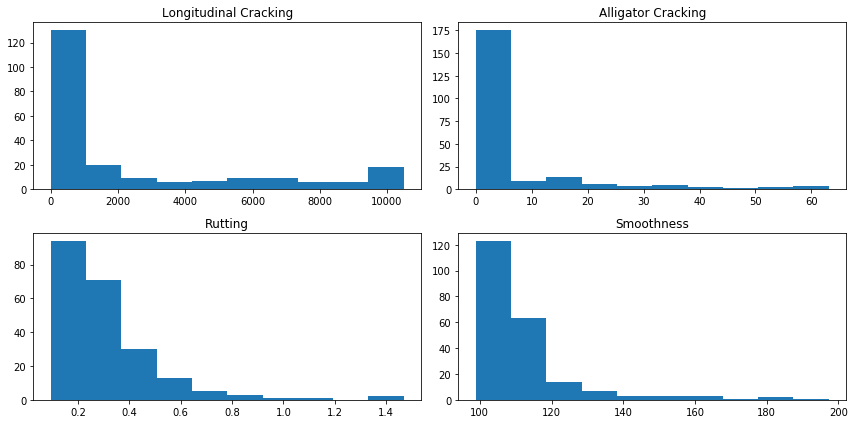

In [8]:
fig, axs = plt.subplots(2, 2,figsize=(12,6))
axs[0, 0].hist(x=df['lc'],bins=10)
axs[0, 0].set_title('Longitudinal Cracking')
axs[0, 1].hist(df['ac'],bins=10)
axs[0, 1].set_title('Alligator Cracking')
axs[1, 0].hist(df['rut'],bins=10)
axs[1, 0].set_title('Rutting')
axs[1, 1].hist(df['iri'],bins=10)
axs[1, 1].set_title('Smoothness')

plt.tight_layout()

**The majority of  responses are skewed to the left. Especially for the case of alligator and longitudinal cracking the majority of the results are small numbers close to zero.** We caught this behavior by looking at the summary of the data as well. We have to perform some kind of transformation to take care of the skewness. 

### Data Correlation

Let's explore correlation between the continuous feature variables by calculating correlation between all continuous numeric variables.

In [9]:
df.corr()

,o_thick,o_effb,o_av,ex_thick,ex_basem,ex_subbasem,sub_m,lc,ac,rut,iri
o_thick,1.000000,-0.024255,-0.033432,-0.064541,-0.020547,0.057281,-0.113019,-0.505420,-0.417434,-0.623894,-0.554082
o_effb,-0.024255,1.000000,-0.107750,0.010397,-0.038456,0.023291,0.019025,-0.108787,-0.202818,0.101378,-0.067709
o_av,-0.033432,-0.107750,1.000000,0.033645,0.081361,-0.094137,-0.025056,0.183928,0.247976,0.201375,0.252579
ex_thick,-0.064541,0.010397,0.033645,1.000000,0.000623,-0.019390,0.047668,-0.414321,0.076972,-0.278689,-0.110018
ex_basem,-0.020547,-0.038456,0.081361,0.000623,1.000000,-0.041710,0.084448,-0.009264,-0.030562,-0.008275,-0.035232
ex_subbasem,0.057281,0.023291,-0.094137,-0.019390,-0.041710,1.000000,0.050422,-0.019165,-0.051338,-0.119312,-0.096870
sub_m,-0.113019,0.019025,-0.025056,0.047668,0.084448,0.050422,1.000000,0.199975,0.112961,0.039630,0.082033
lc,-0.505420,-0.108787,0.183928,-0.414321,-0.009264,-0.019165,0.199975,1.000000,0.598971,0.736031,0.730074
ac,-0.417434,-0.202818,0.247976,0.076972,-0.030562,-0.051338,0.112961,0.598971,1.000000,0.566960,0.900659
rut,-0.623894,0.101378,0.201375,-0.278689,-0.008275,-0.119312,0.039630,0.736031,0.566960,1.000000,0.845592


We use heatmap to show the possible correlations between inputs.

**Strong correlation among pavement responses is evident.** This means that in case there exists a certain kind of pavement damage, another pavement damage is likely to exist too.

**Moreover, correlation of overlay thickness and existing thickness with pavement response is relatively strong.** The correlation is negative, meaning that the thicker the overlay thickness, the lower the pavement response. This is intuitive as we lay down a thicker pavement we expect to observe less damage over time. Same argument can be made for existing pavement thickness.

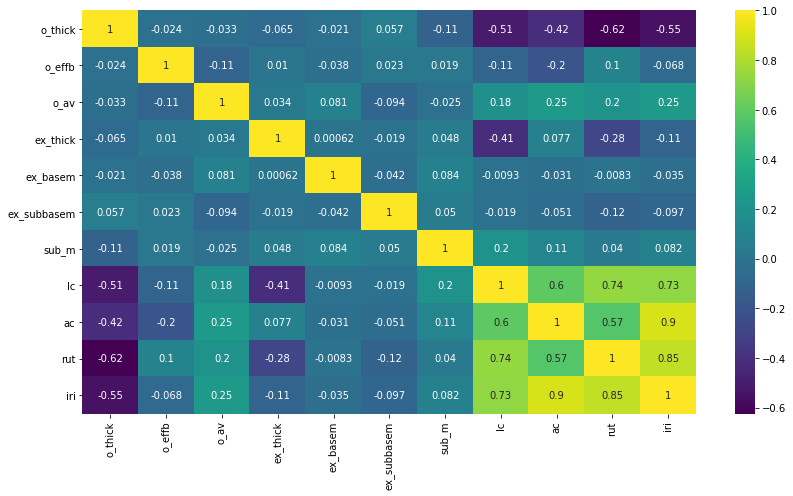

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
#plt.ylim(10, 0)
plt.tight_layout()

### Data Scatter

Scatter plots are another way of showing the dispersion in pavement responses. Previously, we established there is a correlation between pavement response and overlay thickness. So we plot them versus each other. Evidently, for longitudinal and alligator cracking the majority of the pavement responses are closer to zero. Seemingly, any pavement with 3 inch overlay or thicker is strong against alligator cracking.

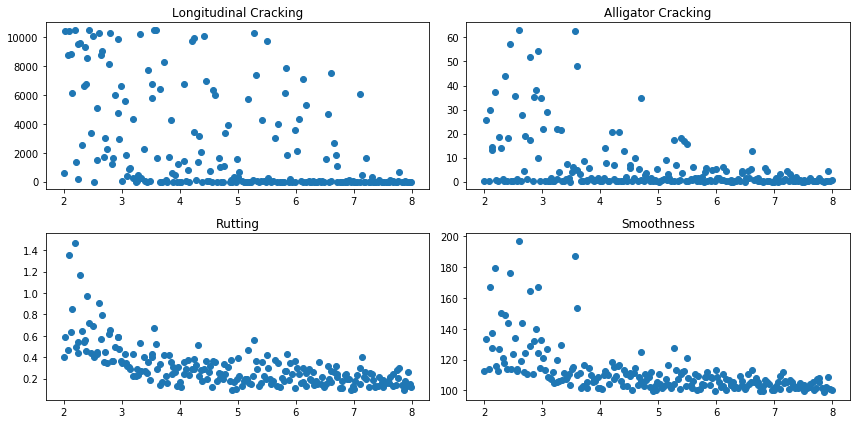

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(12,6))
axs[0, 0].scatter(x=df['o_thick'],y=df['lc'])
axs[0, 0].set_title('Longitudinal Cracking')
axs[0, 1].scatter(x=df['o_thick'],y=df['ac'])
axs[0, 1].set_title('Alligator Cracking')
axs[1, 0].scatter(x=df['o_thick'],y=df['rut'])
axs[1, 0].set_title('Rutting')
axs[1, 1].scatter(x=df['o_thick'],y=df['iri'])
axs[1, 1].set_title('Smoothness')

plt.tight_layout()

Pavement-ME requires more that 100 inputs to predict pavement response over time. Gathering 100 inputs is extremely time-consuming. Furthermore, some of the inputs are not significant and do not contribute to the final outcome. Moreover, Pavement-ME runs could take anywhere between 5 minutes to one hour for each prediction. Therefore, having a model to provide fast predictions using fewer inputs while working on the basis of Pavement-ME could be valuable for pavement engineers. They could use this model for quick prediction and estimation before attempting to employ with Pavement-ME. 

### Taking Care of Categorical Features

Four of our inputs are categorical. We need to convert them to dummy variables before any modeling attempt. Since there are two classes in each categorical variable, we use 0 to denote one class and 1 to denote the other. 

In [12]:
dummies = pd.get_dummies(df[['o_pg','o_agg','ex_rating','climate']], drop_first=True)

In [13]:
dummies

,o_pg_PG 76-28,o_agg_Fine,ex_rating_Very Poor,climate_Pellston
0,0,1,0,0
1,1,0,0,0
2,1,0,1,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
215,0,1,1,1
216,0,1,1,0
217,0,0,0,0
218,1,0,0,0


get_dummies command outputs two columns. We drop the extra column. Moreover, we do not need the variables columns before converting so we remove them from our dataset as well.

In [14]:
df = df.drop(['o_pg','o_agg','ex_rating','climate'],axis=1)

In [15]:
df

,o_thick,o_effb,o_av,ex_thick,ex_basem,ex_subbasem,sub_m,lc,ac,rut,iri
0,5.01,13.87,9.99,10.34,18188,16128,13659,346.0,0.0251,0.393,110.8
1,2.57,11.03,7.19,7.22,29108,13587,14313,1470.0,0.9760,0.430,112.8
2,7.22,9.23,9.48,6.05,39303,19261,10854,1630.0,4.2100,0.194,105.8
3,6.29,13.45,6.24,6.39,26516,10313,20115,22.2,0.0370,0.263,105.6
4,3.81,13.14,8.33,6.72,30223,26441,8641,1720.0,5.5600,0.420,114.6
...,...,...,...,...,...,...,...,...,...,...,...
215,3.08,8.39,11.98,11.17,39516,11447,24354,1870.0,28.9000,0.346,126.9
216,2.25,7.14,6.02,9.89,34589,29069,19228,9530.0,18.4000,0.546,126.7
217,4.31,11.52,11.76,6.14,36367,11760,6096,1360.0,0.2610,0.519,116.0
218,7.10,13.26,5.97,8.69,27671,16354,3254,0.0,0.0782,0.148,101.0


In [16]:
df = pd.concat([df,dummies],axis=1)

In [17]:
df.columns

Index(['o_thick', 'o_effb', 'o_av', 'ex_thick', 'ex_basem', 'ex_subbasem',
       'sub_m', 'lc', 'ac', 'rut', 'iri', 'o_pg_PG 76-28', 'o_agg_Fine',
       'ex_rating_Very  Poor', 'climate_Pellston'],
      dtype='object')

This is how our dataset looks like now:

In [18]:
df

,o_thick,o_effb,o_av,ex_thick,ex_basem,ex_subbasem,sub_m,lc,ac,rut,iri,o_pg_PG 76-28,o_agg_Fine,ex_rating_Very Poor,climate_Pellston
0,5.01,13.87,9.99,10.34,18188,16128,13659,346.0,0.0251,0.393,110.8,0,1,0,0
1,2.57,11.03,7.19,7.22,29108,13587,14313,1470.0,0.9760,0.430,112.8,1,0,0,0
2,7.22,9.23,9.48,6.05,39303,19261,10854,1630.0,4.2100,0.194,105.8,1,0,1,1
3,6.29,13.45,6.24,6.39,26516,10313,20115,22.2,0.0370,0.263,105.6,0,1,0,0
4,3.81,13.14,8.33,6.72,30223,26441,8641,1720.0,5.5600,0.420,114.6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3.08,8.39,11.98,11.17,39516,11447,24354,1870.0,28.9000,0.346,126.9,0,1,1,1
216,2.25,7.14,6.02,9.89,34589,29069,19228,9530.0,18.4000,0.546,126.7,0,1,1,0
217,4.31,11.52,11.76,6.14,36367,11760,6096,1360.0,0.2610,0.519,116.0,0,0,0,0
218,7.10,13.26,5.97,8.69,27671,16354,3254,0.0,0.0782,0.148,101.0,1,0,0,0


We need to apply a minor name change here:

In [19]:
df=df.rename(columns = {'o_pg_PG 76-28':'o_pg','o_agg_Fine':'o_agg','ex_rating_Very  Poor':'ex_rating','climate_Pellston':'climate' })

In [20]:
df

,o_thick,o_effb,o_av,ex_thick,ex_basem,ex_subbasem,sub_m,lc,ac,rut,iri,o_pg,o_agg,ex_rating,climate
0,5.01,13.87,9.99,10.34,18188,16128,13659,346.0,0.0251,0.393,110.8,0,1,0,0
1,2.57,11.03,7.19,7.22,29108,13587,14313,1470.0,0.9760,0.430,112.8,1,0,0,0
2,7.22,9.23,9.48,6.05,39303,19261,10854,1630.0,4.2100,0.194,105.8,1,0,1,1
3,6.29,13.45,6.24,6.39,26516,10313,20115,22.2,0.0370,0.263,105.6,0,1,0,0
4,3.81,13.14,8.33,6.72,30223,26441,8641,1720.0,5.5600,0.420,114.6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3.08,8.39,11.98,11.17,39516,11447,24354,1870.0,28.9000,0.346,126.9,0,1,1,1
216,2.25,7.14,6.02,9.89,34589,29069,19228,9530.0,18.4000,0.546,126.7,0,1,1,0
217,4.31,11.52,11.76,6.14,36367,11760,6096,1360.0,0.2610,0.519,116.0,0,0,0,0
218,7.10,13.26,5.97,8.69,27671,16354,3254,0.0,0.0782,0.148,101.0,1,0,0,0


## Data Modeling

There are 4 different pavement responses: Rutting, Alligator cracking, Longitudinal cracking and IRI. Therefore, we would like to create four different models to predict each one of these pavement responses. We start by modeling rutting in pavement.

We modify our dataset to create X and y for modeling. X is the portion of dataset containing inputs, and y is the rest, containing pavement responses.

In [7]:
X = df.drop(['lc','ac','rut','iri'],axis=1)
y_rut = df['rut']
y_lc = df['lc']
y_ac = df['ac']
y_iri = df['iri']

### Rutting Model

From scikit-Learn we import train_test_split module to split our dataset into training and testing sets. We use 70% of our data for training and 30% for testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y_rut,test_size=0.3)

#### Scaling

The inputs consist of variables with different orders of magnitude. Some inputs such as thickness vary from 2 to 8 while some other vary from 10,000 to 100,000. Thus it is essential to perform scaling on our inputs. We use MinMaxScale that transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

#### Creating a Model

Due to the extreme non-linear nature of pavement response models, we pick neural networks as our modeling technique. 

We use TensorFlow 2.0 and accompanying Keras package. Keras Sequential model which is a linear stack of layers seems like a good start for our modeling purpose. We also need to import Dense (which is just your regular densely-connected NN layer) and Activation that applies an activation function to an output. Finally we use Adam as an optimizer. 

*Note: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.*

In [28]:
import tensorflow as tf

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Our sequential model consists of 5 layers (first 4 being our hidden layers and last one being the output layer) using Rectified Linear Unit (ReLU) as activation function.

In this model we are minimizing loss in terms of mean suqared error. The loss value that will be minimized by the model will then be the sum of all individual losses.

In [30]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

#### Training the Model

We are set to train our model. We perform training 400 times and measure loss over the course of training session. 

In [31]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=400, verbose = 0)

In [32]:
losses = pd.DataFrame(model.history.history)

In Figure below, loss vs. Epochs or training sessions is illustrated. There is a sharp decline of loss from 0.2 to 0.01 within the first 50 epochs for both training and validation sets. This is good news for us.

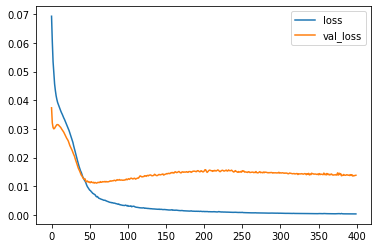

In [33]:
losses.plot()

#### Evaluation on Test Data

In order to evaluate our model, we perform predictions using our model on our test data set and measure 3 indicators: **mean squared error, mean absolute error and explained variance score.**

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [35]:
predictions = model.predict(X_test)

In [36]:
mean_absolute_error(y_test,predictions)

0.06930457943497283

Mean absolute error for rutting model is 0.07. By looking at our dataset the mean rutting is 0.5. Therefore, the mean absolute error is at 14%.

Next, we compute mean squared error and explained variance score. When we compare the R2 Score with the Explained Variance Score, we are basically checking the Mean Error; so if R2 = Explained Variance Score, that means: The Mean Error = Zero! ***This turns out to be the case for our model!***

The Mean Error reflects the tendency of our estimator, that is: the Biased v.s Unbiased Estimation.

In [37]:
np.sqrt(mean_squared_error(y_test,predictions))

0.11773929093437135

In [38]:
explained_variance_score(y_test,predictions)

0.5511732981081093

Moreover, we check how close our predictions are to Pavement-ME predictions. The red line is the equality line. Ideally we want all data points to fall on the red line. However, due to error of predictions there will be a spread.

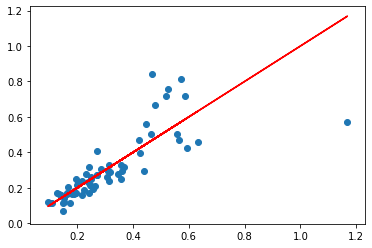

In [39]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [40]:
errors = y_test.values - predictions

Finally, we plot the distribution of errors in prediction. Ideally we would like to see a sharp peak in the middle (at zero). However, due to the error in the prediction there is a band with most of the error hovering around zero.

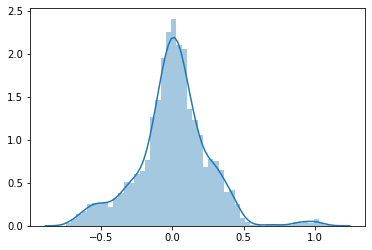

In [41]:
 sns.distplot(errors)

### IRI Model

We follow the same procedure to split our data set for training and testing, use scaling on X, sequential model with adam optimizer as the model. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y_iri,test_size=0.3)

#### Scaling

In [43]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Model

150 epochs seem enough to achieve the minimum possible loss.

In [44]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=150, verbose = 0)

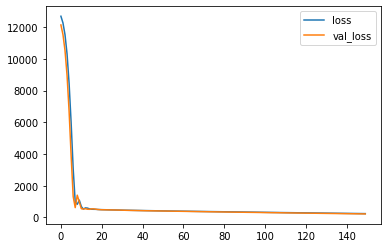

In [45]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Loss drop by a factor of 10, from initial values of 12000 to 1200. Training loss and validation loss plateaus out at around the same value. 

####Evaluation on Test Data

In [46]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

10.469686727812794

The average observed IRI is 112. The absolute mean error for the model is ~10 which is less than 9% of the mean observed IRI. 

In [47]:
np.sqrt(mean_squared_error(y_test,predictions))

14.773780234840382

In [48]:
explained_variance_score(y_test,predictions)

-0.13176791875053429

The explained variance is returned as -0.13. It is not that uncommon to get negative variance. The solution is either to simplify model or get more data. A look at the prediction and observation indicate a decent fit between them. Therefore, the next step of the research should be getting more data for IRI.

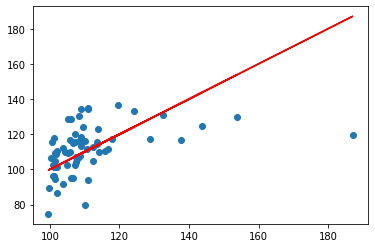

In [49]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

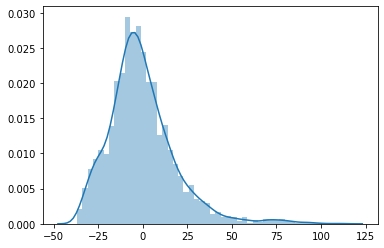

In [50]:
errors = y_test.values - predictions
sns.distplot(errors)

Furthermore, the model does a good job in prediction error with an average error close to zero and a relatively narrow band.

### Longitudinal Crackong Model

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y_lc,test_size=0.3)

#### Scaling

In [52]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Model

We stick to our established procedure for creating a model for longitudinal cracking. 

In [53]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=400, verbose = 0)

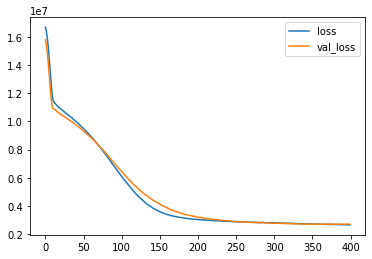

In [54]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Evaluation on Test Data

In [55]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

965.4469926198324

The model mean absolute error is ~965 which compared to mean value of observations (2350) is relatively high. The error rate is at 40%

In [56]:
np.sqrt(mean_squared_error(y_test,predictions))

1641.8161199672963

Large MSE also confirms the massive error in predictions.  

In [57]:
explained_variance_score(y_test,predictions)

0.7605858320223533

However, explained variance indicates the model does a relatively good job in predicting the trends in data as shown by the figure below as well. 

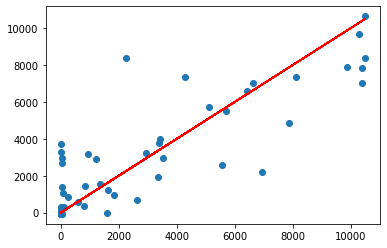

In [58]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

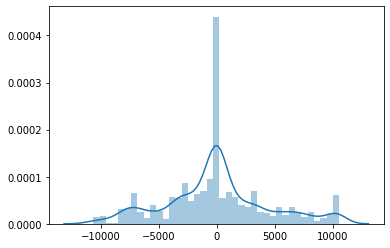

In [59]:
errors = y_test.values - predictions
sns.distplot(errors)

The problem with longitudinal cracking is the abundance of zero or near-zero observation. One way to take care of skewed data is Box-Cox scaling. However, box-cox works with positive values strictly. So we go with the alternative, Yeo-Johnson algorithm.

In [60]:
from sklearn.preprocessing import PowerTransformer

In [61]:
pscaler = PowerTransformer(method='yeo-johnson',standardize=True, copy=True)

In [62]:
X_train = pscaler.fit_transform(X_train)
X_test = pscaler.transform(X_test)

In [63]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=200, verbose = 0)

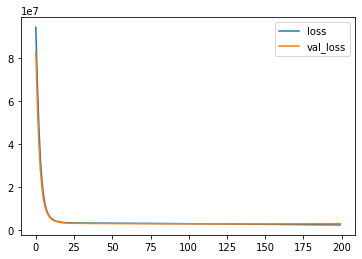

In [64]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [65]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

1086.3776929404519

As observed by the calculated errors and explained variance, the problem with longitudinal cracking persists. The last options for use would be increasing the sample size and gathering more data. 

In [66]:
np.sqrt(mean_squared_error(y_test,predictions))

1689.5723184126762

In [67]:
explained_variance_score(y_test,predictions)

0.7469733694565732

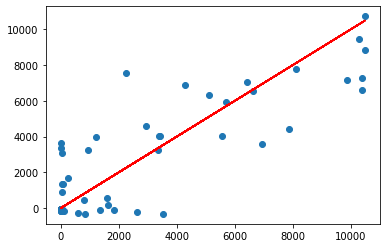

In [68]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

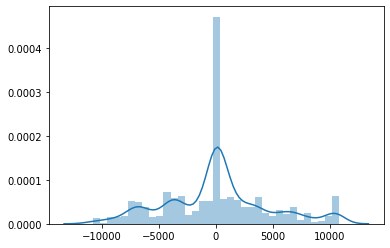

In [69]:
errors = y_test.values - predictions
sns.distplot(errors)

### Alligator Cracking

We follow the same procedure for alligator cracking as longitudinal cracking. First we scale our data using MinMaxScaler. Then we apply Yeo-Johnson algorithm.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y_ac,test_size=0.3)

#### Scaling

In [71]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Model

In [72]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=200, verbose = 0)

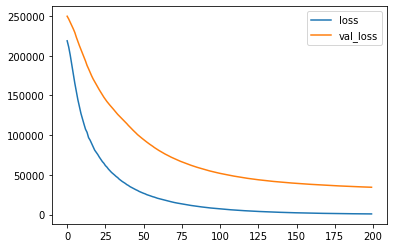

In [73]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Evaluation on Test Data

Whether using MinMaxScaler or Yeo-Johnson algorithm the predictions are poor. In this case the explained variance is very poor too. Looking at alligator cracking data we find out the number of "0" cracking observations are even more prevalent. Therefore model is working with only a handful of non-zero values for prediction. Therefore, it is imperative to collect a larger pool of data to make modeling possible.

In [74]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

34.20084266426203

In [75]:
np.sqrt(mean_squared_error(y_test,predictions))

185.48178796166195

In [76]:
explained_variance_score(y_test,predictions)

-358.79172291422776

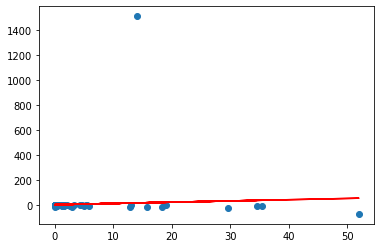

In [77]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

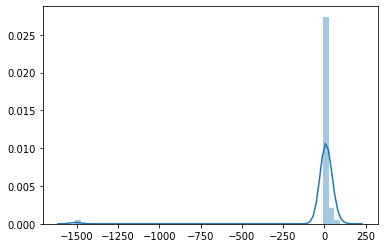

In [78]:
errors = y_test.values - predictions
sns.distplot(errors)

In [79]:
X_train = pscaler.fit_transform(X_train)
X_test = pscaler.transform(X_test)

In [80]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=200, verbose = 0)

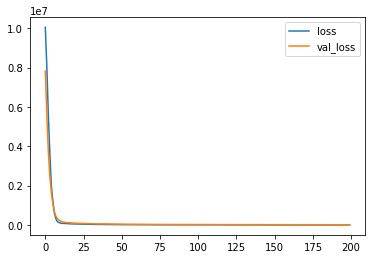

In [81]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [82]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

18.636774253088053

In [83]:
np.sqrt(mean_squared_error(y_test,predictions))

94.65636472848888

In [84]:
explained_variance_score(y_test,predictions)

-92.83218223410343

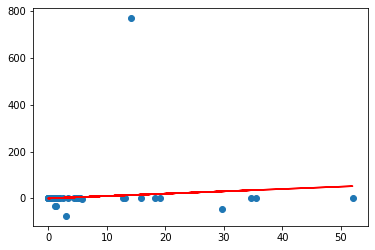

In [85]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

# References
[1] Policy and Governmental Affairs Office of Highway Policy Information

[2] BidNet.com Business Insight

[3] The Mechanistic-Empirical Pavement Design Guide, related documentation, and the latest version of its software are available online for evaluation through 30 September 2011.

[4] Latin Hypercube Sampling: Simple Definition. Statistics How To. 

[5] Preparation for Implementation of the MechanisticEmpirical Pavement Design Guide in Michigan Part 3 